In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('data/test.csv')
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
test['Survived'] = test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [4]:
submit = pd.DataFrame(data={'PassengerId':test['PassengerId'],'Survived':test['Survived']})
submit.to_csv('genderModel.csv',index=False)

In [5]:
train = pd.read_csv('data/train.csv')

In [6]:
train[(train['Sex']=='male')&(train['Age']<16)]['Survived'].value_counts()

1    21
0    19
Name: Survived, dtype: int64

In [7]:
train[(train['Sex']=='female')&(train['Pclass']==3)]['Survived'].value_counts()

1    72
0    72
Name: Survived, dtype: int64

In [8]:
display(train['Name'].sample(30))

602                            Harrington, Mr. Charles H
557                                  Robbins, Mr. Victor
550                          Thayer, Mr. John Borland Jr
470                                    Keefe, Mr. Arthur
82                        McDermott, Miss. Brigdet Delia
684                    Brown, Mr. Thomas William Solomon
565                                 Davies, Mr. Alfred J
532                                 Elias, Mr. Joseph Jr
361                            del Carlo, Mr. Sebastiano
305                       Allison, Master. Hudson Trevor
841                             Mudd, Mr. Thomas Charles
120                          Hickman, Mr. Stanley George
164                         Panula, Master. Eino Viljami
862    Swift, Mrs. Frederick Joel (Margaret Welles Ba...
656                                Radeff, Mr. Alexander
409                                   Lefebre, Miss. Ida
540                              Crosby, Miss. Harriet R
498      Allison, Mrs. Hudson J

In [9]:
train['Title'] = train['Name'].apply(lambda x: str(x).split(', ')[1].split('.')[0])

In [10]:
display(train['Title'].head(10))

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [11]:
print(train['Title'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
Capt              1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Sir               1
Mme               1
Name: Title, dtype: int64


In [12]:
def transform_title(x):
    if x in ["Capt","Don","Major","Col","Rev",
             "Dr","Sir","Mr","Jonkheer"]:
        return 'man'
    elif x in ["Dona","the Countess","Mme","Mlle",
             "Ms","Miss","Lady","Mrs"]:
        return 'woman'
    elif x in ['Master']:
        return 'boy'

In [13]:
train['Title'] = train['Title'].apply(transform_title)

In [14]:
print(train['Title'].value_counts())

man      538
woman    313
boy       40
Name: Title, dtype: int64


In [15]:
train['Surname'] = train['Name'].apply(lambda x: str(x).split(',')[0])
train.loc[train['Title']=='man','Surname' ]= 'noGroup'

In [16]:
SurnameCounts = train['Surname'].value_counts()
display(SurnameCounts.head())

noGroup      538
Andersson      7
Skoog          5
Goodwin        5
Rice           5
Name: Surname, dtype: int64

In [17]:
SurnameCounts['Goodwin']

5

In [18]:
train['SurnameFreq'] = train['Surname'].apply(lambda x: SurnameCounts[x])

In [19]:
display(train['SurnameFreq'].value_counts())

538    538
1      211
2       74
4       28
3       18
5       15
7        7
Name: SurnameFreq, dtype: int64

In [20]:
train.loc[train['SurnameFreq']<=1,'Surname' ]= 'noGroup'

In [21]:
SurnameSurvival = train.groupby('Surname')['Survived'].mean()

In [22]:
display(SurnameSurvival.value_counts())

1.000000    34
0.000000    16
0.750000     2
0.333333     1
0.347130     1
0.142857     1
Name: Survived, dtype: int64

In [23]:
train['SurnameSurvival'] = train['Surname'].apply(lambda x: SurnameSurvival[x])

In [24]:
x=train.loc[train['SurnameSurvival']==0,'Surname'].unique()
print(sorted(x))

['Barbara', 'Boulos', 'Bourke', 'Ford', 'Goodwin', 'Jussila', 'Lefebre', 'Palsson', 'Panula', 'Rice', 'Sage', 'Skoog', 'Strom', 'Van Impe', 'Vander Planke', 'Zabour']


In [25]:
x=train.loc[train['SurnameSurvival']==1,'Surname'].unique()
print(sorted(x))

['Baclini', 'Becker', 'Brown', 'Caldwell', 'Collyer', 'Coutts', 'Doling', 'Fortune', 'Goldsmith', 'Graham', 'Hamalainen', 'Harper', 'Hart', 'Hays', 'Herman', 'Hippach', 'Johnson', 'Kelly', 'Laroche', 'Mellinger', 'Moor', 'Moubarek', 'Murphy', 'Navratil', 'Newell', 'Nicola-Yarred', 'Peter', 'Quick', 'Richards', 'Ryerson', 'Sandstrom', 'Taussig', 'West', 'Wick']


In [26]:
display(train.loc[train['SurnameSurvival']==1/7,['Surname','Title','Survived']])
display(train.loc[train['SurnameSurvival']==1/3,['Surname','Title','Survived']])
display(train.loc[train['SurnameSurvival']==3/4,['Surname','Title','Survived']])

,Surname,Title,Survived
68,Andersson,woman,1
119,Andersson,woman,0
541,Andersson,woman,0
542,Andersson,woman,0
610,Andersson,woman,0
813,Andersson,woman,0
850,Andersson,boy,0


,Surname,Title,Survived
297,Allison,woman,0
305,Allison,boy,1
498,Allison,woman,0


,Surname,Title,Survived
25,Asplund,woman,1
182,Asplund,boy,0
233,Asplund,woman,1
261,Asplund,boy,1
435,Carter,woman,1
763,Carter,woman,1
802,Carter,boy,1
854,Carter,woman,0


In [27]:
train['AdjustedSurvival'] = (train['SurnameSurvival']*train['SurnameFreq']-train['Survived'])/(train['SurnameFreq']-1)

In [28]:
train['predict'] = 0
train.loc[train['Title']=='woman','predict'] = 1
train.loc[(train['Title']=='boy')&(train['AdjustedSurvival']==1),'predict'] = 1
train.loc[(train['Title']=='woman')&(train['AdjustedSurvival']==0),'predict'] = 0

In [29]:
import seaborn as sns

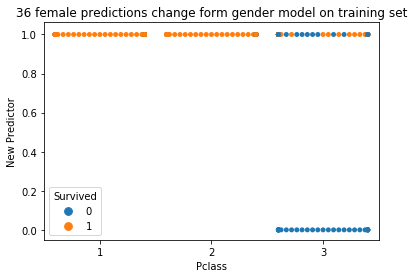

0    35
1     1
Name: Survived, dtype: int64

In [30]:
sns.swarmplot(data=train[train['Title']=='woman'],x='Pclass',y='predict',hue='Survived')
plt.xlabel('Pclass')
plt.ylabel('New Predictor')
plt.title('36 female predictions change form gender model on training set')
plt.show()
display(train[(train['Title']=='woman')&(train['predict']==0)]['Survived'].value_counts())

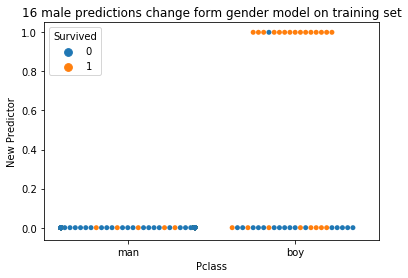

In [31]:
sns.swarmplot(data=train[train['Title']!='woman'],x='Title',y='predict',hue='Survived')
plt.xlabel('Pclass')
plt.ylabel('New Predictor')
plt.title('16 male predictions change form gender model on training set')
plt.show()

In [32]:
display(train[(train['Title']!='woman')&(train['predict']==1)]['Survived'].value_counts())

1    15
0     1
Name: Survived, dtype: int64

In [33]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [34]:
test['Survived'] = np.nan
all_data = pd.concat([train,test],ignore_index=True)

In [35]:
all_data['Title'] = all_data['Name'].apply(lambda x: str(x).split(', ')[1].split('.')[0])

In [36]:
all_data['Title'] = all_data['Title'].apply(transform_title)

In [37]:
all_data['Surname'] = all_data['Name'].apply(lambda x: str(x).split(',')[0])
all_data.loc[all_data['Title']=='man','Surname' ]= 'noGroup'

In [38]:
SurnameCounts = all_data['Surname'].value_counts()

In [39]:
all_data['SurnameFreq'] = all_data['Surname'].apply(lambda x: SurnameCounts[x])

In [40]:
all_data.loc[all_data['SurnameFreq']<=1,'Surname' ]= 'noGroup'

In [41]:
# search single woman and children and 
# correct surname groups using Ticket
def checkTicket(x):
    if (x['Title']!='man')&(x['Surname']=='noGroup'):
        return all_data.loc[all_data['Ticket']==x['Ticket'],'Surname'].iloc[0]
    else:
        return x['Surname']
all_data['Surname'] = all_data.apply(checkTicket,axis=1)

In [43]:
SurnameSurvival = all_data.groupby('Surname')['Survived'].mean()

In [44]:
all_data['SurnameSurvival'] = all_data['Surname'].apply(lambda x: SurnameSurvival[x])

In [45]:
all_data['SurnameSurvival'].value_counts()

0.316832    1036
1.000000     165
0.000000      72
0.750000      10
0.142857       8
0.500000       5
Name: SurnameSurvival, dtype: int64

In [46]:
all_data['predict'] = 0

In [47]:
all_data.loc[all_data['Title']=='woman','predict'] = 1
all_data.loc[(all_data['Title']=='boy')&(all_data['SurnameSurvival']==1),'predict'] = 1
all_data.loc[(all_data['Title']=='woman')&(all_data['SurnameSurvival']==0),'predict'] = 0

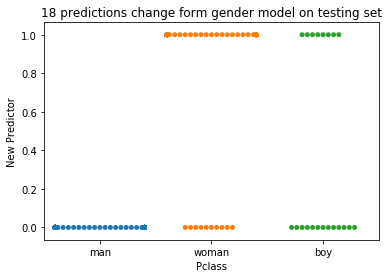

In [48]:
testSet = all_data[all_data['Survived'].isna()]
sns.swarmplot(data=testSet,x='Title',y='predict')
plt.xlabel('Pclass')
plt.ylabel('New Predictor')
plt.title('18 predictions change form gender model on testing set')
plt.show()

In [49]:
submit = pd.DataFrame({'PassengerId': testSet['PassengerId'],'Survived':testSet['predict']})
submit.to_csv('genderSurnameModel.csv',index=False)